## Linear Regression with PyTorch
Training:<BR/>
1- Model Design (Input, Output, Forward Pass)<BR/>
2- Definition of Loss and Optimzer Function<BR/>
3- Training loop:
  - Forward Pass: Calculating Prediction and Loss
  - Backwarpass: Calculate Gradients
  - Update Weights

  https://www.youtube.com/watch?v=joaYDx1HTcA&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=7

In [34]:
# import libraries
import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1])
torch.Size([100, 1])


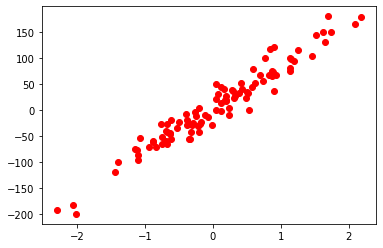

In [35]:
# prepare data: convert array numpy to torch
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32)) # independent variable, change stype to torch
y = torch.from_numpy(y_numpy.astype(np.float32))  # dependent variable, change stype to torch
y = y.view(y.shape[0], 1)  # change the dimension of the array; from horizontal to vertical.

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')  # plot the dataset

In [36]:
# Model Design
input_size = 1     # because we have only one independent variable
output_size = 1
model = nn.Linear(input_size, output_size) # create the model

In [37]:
# Definition of Loss and Optimzer Function 
learning_rate = 0.01  #learning_rate to normalize the magnitude
criterion = nn.MSELoss()   # mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # uses SGD to optimze, update the weights  
print (model.parameters())  # calculate the Loss

<generator object Module.parameters at 0x7f44b65af830>


In [38]:
# Training loop
num_epochs = 1000 # make the process of create the line 1000 times (iteration)
contador_custo = []
for epoch in range(num_epochs):
  #forward pass and loss
  y_hat = model(x)   # prediction of x
  loss = criterion(y_hat, y)
  contador_custo.append(loss)

In [39]:
# backward pass (calculate the gradients)
loss.backward()

In [40]:
# update weights
optimizer.step()

Epoch:  999
Custo: 5792.41748046875000000000
Coeficientes: 
m: 0.84485918283462524414
m (gradiente): 0.00000000000000000000
b: 0.94642919301986694336
b (gradiente): 0.00000000000000000000
0.84
0.00
0.95
0.00


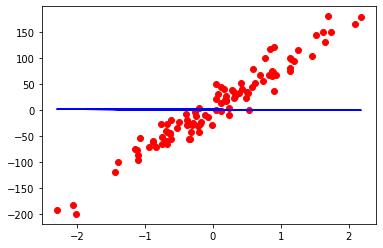

In [45]:
 if (epoch+1)%10 == 0:
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('Coeficientes: ')
      print('m: {:.20f}'.format(model.weight.data.detach().item()))
      print('m (gradiente): {:.20f}'.format(model.weight.grad.detach().item()))
      print('b: {:.20f}'.format(model.bias.data.detach().item()))
      print('b (gradiente): {:.20f}'.format(model.bias.grad.detach().item()))
     #  for p in model.parameters():
     #   print('{:.2f}'.format(p.data.detach().item()))
     #   print('{:.2f}'.format(p.grad.detach().item()))
      previsao_final = y_hat.detach().numpy()
      plt.plot(x_numpy, y_numpy, 'ro') 
      plt.plot(x_numpy, previsao_final, 'b')
      plt.show()

In [46]:
# clear the optimizer
optimizer.zero_grad()

GRÁFICO DA FUNÇÃO DE CUSTO


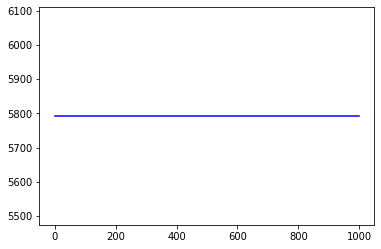

In [47]:
# plot the loss function chart
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

## Other references:
- https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd